# CICERO SCM notebook example - interactive input

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
try:
    from pandas.core.common import SettingWithCopyWarning
except:
    from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

/tmp/ipykernel_4070942/1364117225.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions

Define a function to convert model output to a dataframe

In [4]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

set up input directories

In [5]:
# test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')
test_data_dir = "/user/home/lw13938/work/ciceroscm/tests/test-data/"

# Read in datafiles into dataframes

In [6]:
# NBVAL_IGNORE_OUTPUT
#Read gas parameters
gaspam =read_components(test_data_dir + '/gases_v1RCMIP.txt')
gaspam.head()

/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_gas = pd.read_csv(filename, delim_whitespace=True, index_col=0)


,EM_UNIT,CONC_UNIT,BETA,ALPHA,TAU1,TAU2,TAU3,NAT_EM,SARF_TO_ERF
GAS,,,,,,,,,
CO2,Pg_C,ppm,2.123,0.00000,150.00,0,0,0.0,1.000000
CH4,Tg,ppb,2.780,0.00000,9.60,120,160,275.0,0.877193
N2O,Tg_N,ppb,4.810,0.00000,121.00,0,0,9.5,1.000000
SO2,Tg_S,-,11.000,0.00000,0.02,0,0,0.0,1.000000
CFC-11,Gg,ppt,22.600,0.00026,45.00,0,0,0.0,1.000000


Read natural emissions

In [7]:
# NBVAL_IGNORE_OUTPUT
df_nat_ch4 =read_natural_emissions(test_data_dir + '/natemis_ch4.txt','CH4')
df_nat_n2o =read_natural_emissions(test_data_dir + '/natemis_n2o.txt','N2O')
df_nat_ch4.head()


,CH4
year,
1750,269.4273
1751,270.9068
1752,273.0183
1753,272.0470
1754,271.1915


Read forcing

In [8]:
df_ssp2_conc =read_inputfile(test_data_dir + '/ssp245_conc_RCMIP.txt')
df_ssp2_conc.head()

/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:98: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_input = pd.read_csv(


,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
Component,,,,,,,,,,,,,,,,,,,,,
1700,276.746000,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1701,276.749995,706.247004,272.243047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1702,276.757998,706.375031,272.266047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1703,276.757001,706.491002,272.298047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1704,276.755000,706.602046,272.331052,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0


In [9]:
df_ssp2_conc

,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
Component,,,,,,,,,,,,,,,,,,,,,
1700,276.746000,706.054021,272.212049,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1701,276.749995,706.247004,272.243047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1702,276.757998,706.375031,272.266047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1703,276.757001,706.491002,272.298047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1704,276.755000,706.602046,272.331052,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,579.768997,997.339930,359.840983,0.015106,2.975109,0.251401,1.05305,3.93032,4.880721,0.000,...,0.263055,0.000179,3.15741,0.0,0.0,0.0,9.59912,0.685107,140.825001,18.1191
2497,579.599996,997.329926,359.825979,0.014794,2.943329,0.248462,1.04701,3.92252,4.880821,0.000,...,0.257128,0.000173,3.14129,0.0,0.0,0.0,9.59816,0.684886,140.822000,18.1134
2498,579.432007,997.319931,359.811981,0.014489,2.911889,0.245556,1.04100,3.91474,4.880931,0.000,...,0.251334,0.000167,3.12525,0.0,0.0,0.0,9.59720,0.684665,140.818998,18.1077


In [10]:
emi_input =read_inputfile(test_data_dir + '/ssp245_em_RCMIP.txt')
emi_input.rename(columns={"CO2": "CO2_FF", "CO2.1": "CO2_AFOLU"}, inplace=True)
emi_input.head()

/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:98: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_input = pd.read_csv(


,CO2_FF,CO2_AFOLU,CH4,N2O,SO2,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,...,CF4,SF6,NOx,CO,NMVOC,NH3,BMB_AEROS_BC,BMB_AEROS_OC,BC,OC
Component,,,,,,,,,,,,,,,,,,,,,
1750,0.002592,0.081127,19.019783,0.054710,1.222464,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.871504,348.527359,60.021826,6.927690,1.353250,12.520269,0.744520,2.927399
1751,0.002593,0.082619,18.915109,0.055744,1.206598,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828060,343.926367,59.088126,6.860142,1.335274,12.279280,0.737652,2.909437
1752,0.002594,0.084139,18.889712,0.056797,1.200955,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828658,341.809034,58.631997,6.819482,1.326617,12.121816,0.737695,2.912659
1753,0.002594,0.085687,19.121377,0.057870,1.207757,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.812105,343.675456,59.026349,6.881439,1.328560,12.249330,0.743391,2.933215
1754,0.002595,0.087263,19.509061,0.058963,1.233495,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.841598,349.815625,60.269945,7.015189,1.346553,12.593635,0.752796,2.965138


# Set up model run with defined input variables

In [11]:
# NBVAL_IGNORE_OUTPUT
scen = 'test'
cscm_dir=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1750,  
            "conc_run":True,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
        })

11
12
113
114
115
22
141
123
142


/user/work/lw13938/ciceroscm/src/ciceroscm/input_handler.py:513: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_data = pd.read_csv(


and run it!

In [12]:
# NBVAL_IGNORE_OUTPUT
cscm_dir._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qh2o_ch4":.171,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24})

List available output

In [13]:
cscm_dir.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'Total_forcing', 'Solar_forcing', 'Volcanic_forcing_NH', 'Volcanic_forcing_SH', 'emissions', 'concentrations', 'forcing'])

Convert the output to a dataframe for easy handling

In [14]:

df_temp = to_df(cscm_dir)


In [15]:
# NBVAL_IGNORE_OUTPUT
df_temp.head()

OHC700    OHCTOT  RIB_glob     RIB_N     RIB_S   dT_glob     dT_NH  \
          0         0         0         0         0         0         0   
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.001218 -0.001227 -0.001697 -0.002999 -0.000395 -0.000079 -0.000141   
2 -0.003177 -0.003228 -0.001414 -0.003285  0.000457 -0.000260 -0.000454   
3 -0.003076 -0.003181  0.001253  0.000069  0.002437 -0.000262 -0.000493   
4  0.001742  0.001642  0.005722  0.006074  0.005370  0.000119  0.000028   

      dT_SH dT_glob_air dT_NH_air  ...  forcing                         \
          0           0         0  ... STRAT_O3 STRAT_H2O BMB_AEROS_BC   
0  0.000000    0.000000  0.000000  ...      NaN       NaN          NaN   
1 -0.000017   -0.000127 -0.000225  ...      NaN       NaN          NaN   
2 -0.000066   -0.000338 -0.000616  ...      NaN       NaN          NaN   
3 -0.000032   -0.000260 -0.000573  ...      NaN       NaN          NaN   
4  0.000211    0.000307  0.000189  ...      NaN       NaN          NaN   

                                                              
  BMB_AEROS_OC BMB_AEROS LANDUSE  BC  OC OTHER Total_forcing  
0          NaN       NaN     NaN NaN NaN   NaN           NaN  
1          NaN       NaN     NaN NaN NaN   NaN           NaN  
2          NaN       NaN     NaN NaN NaN   NaN           NaN  
3          NaN       NaN     NaN NaN NaN   NaN           NaN  
4          NaN       NaN     NaN NaN NaN   NaN           NaN  

[5 rows x 153 columns]

# Plot output

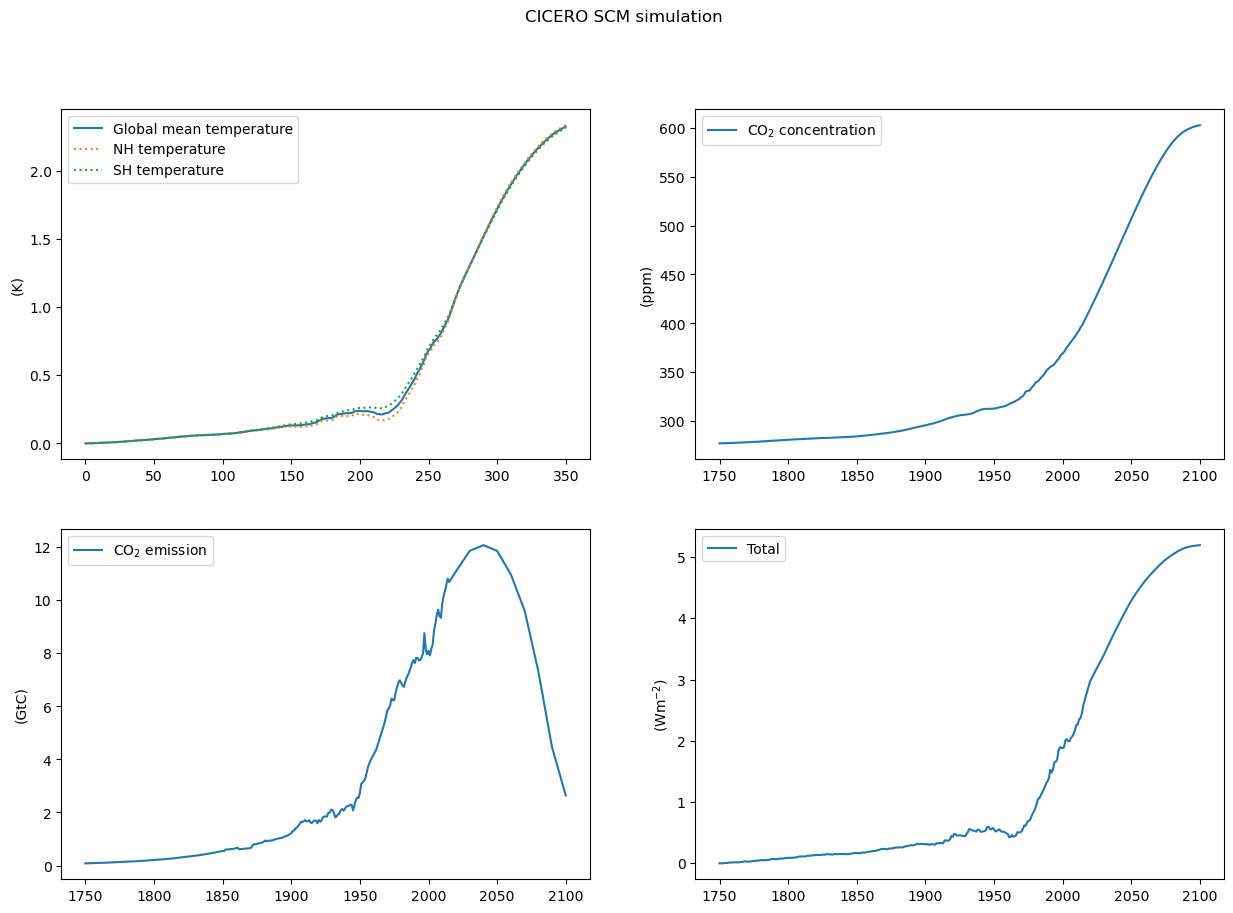

In [16]:
# NBVAL_IGNORE_OUTPUT
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_temp['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_temp['emissions']['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_temp['forcing']['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])

In [16]:
for i in enumerate(df_temp.columns):
    print(i)

(0, ('OHC700', 0))
(1, ('OHCTOT', 0))
(2, ('RIB_glob', 0))
(3, ('RIB_N', 0))
(4, ('RIB_S', 0))
(5, ('dT_glob', 0))
(6, ('dT_NH', 0))
(7, ('dT_SH', 0))
(8, ('dT_glob_air', 0))
(9, ('dT_NH_air', 0))
(10, ('dT_SH_air', 0))
(11, ('dT_glob_sea', 0))
(12, ('dT_NH_sea', 0))
(13, ('dT_SHsea', 0))
(14, ('Total_forcing', 0))
(15, ('Solar_forcing', 0))
(16, ('Volcanic_forcing_NH', 0))
(17, ('Volcanic_forcing_SH', 0))
(18, ('emissions', 'Year'))
(19, ('emissions', 'CO2'))
(20, ('emissions', 'CH4'))
(21, ('emissions', 'N2O'))
(22, ('emissions', 'SO2'))
(23, ('emissions', 'CFC-11'))
(24, ('emissions', 'CFC-12'))
(25, ('emissions', 'CFC-113'))
(26, ('emissions', 'CFC-114'))
(27, ('emissions', 'CFC-115'))
(28, ('emissions', 'CH3Br'))
(29, ('emissions', 'CCl4'))
(30, ('emissions', 'CH3CCl3'))
(31, ('emissions', 'HCFC-22'))
(32, ('emissions', 'HCFC-141b'))
(33, ('emissions', 'HCFC-123'))
(34, ('emissions', 'HCFC-142b'))
(35, ('emissions', 'H-1211'))
(36, ('emissions', 'H-1301'))
(37, ('emissions', 'H-24